# Creating Final Dataset

## Relinking photos with Dataframe

In [10]:
import pandas as pd
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt


#read in existing dataframe
df = pd.read_csv('../congress2023-04-11.csv', index_col=0)
df = df.reset_index(drop=True)

#main loop
missing = []
parray = []
#df["picArray"] = np.nan

for i, value in enumerate(df['photo']):
    cid = (value)[12:23]
    
    try:
        cphoto = cv2.imread('../photos/' + cid + '.jpg')
        parray.append(cv2.cvtColor(cphoto, cv2.COLOR_BGR2RGB))
        
    except:
        #print("Error on iteration", i, 'with image id:', cid)
        parray.append(None)
        missing.append(value)
    
    #if i == 3:
    #    break
      
#save image array as df column
df['picArray'] = parray

#removing rows with no party affiliation
df = df[df['party'].isin(['R', 'D'])]
df = df.reset_index(drop=True)

#dropping rows with no image
df = df.dropna(axis=0, subset='picArray')
df = df.reset_index(drop=True)

#shuffling order
df = df.sample(frac=1).reset_index(drop=True)

#creating train, validation and test sets --> 80/5/15 rule
train = df.iloc[0:1510] #1510
valid = df.iloc[1510:1605] #95
test = df.iloc[1605:] #283 rows

#check
print(len(train.index))
print(len(valid.index))
print(len(test.index))

#save it
#train is too big, need to split it
train_split = np.array_split(train, 2)
#saving
train_split[0].to_pickle('UScongress_train_1.pkl')
train_split[1].to_pickle('UScongress_train_2.pkl')
valid.to_pickle('UScongress_validation.pkl')
test.to_pickle('UScongress_test.pkl')




#old saving method
#split into republicans and democrats
#dems = df.loc[df.party == 'D']
#repubs = df.loc[df.party == 'R']

#split each into 3 to fit with Git's file size limits :(
#dems_split = np.array_split(dems, 3)
#repubs_split = np.array_split(repubs, 3)

#save them
#for i in range(3):
#    dems_split[i].to_pickle('democrat_faces_' + str(i) + '.pkl')
#    repubs_split[i].to_pickle('republican_faces' + str(i) + '.pkl')

1510
95
284


1510
95
284


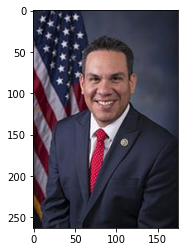

In [11]:
#double check that we can read them in fine

import pandas as pd
train1 = pd.read_pickle('UScongress_train_1.pkl')
train2 = pd.read_pickle('UScongress_train_2.pkl')
train = pd.concat([train1, train2])
valid = pd.read_pickle('UScongress_validation.pkl')
test = pd.read_pickle('UScongress_test.pkl')
del(train1, train2)

print(len(train.index))
print(len(valid.index))
print(len(test.index))

import matplotlib.pyplot as plt
plt.imshow(test.iloc[140, test.columns.get_loc('picArray')])

In [112]:
# #check - read them in
# import pandas as pd
# dems = []
# repubs = []

# for i in range(3):
#     dems.append(pd.read_pickle('democrat_faces_' + str(i) + '.pkl'))
#     repubs.append(pd.read_pickle('republican_faces' + str(i) + '.pkl')) 

    
# dems = pd.concat(dems)
# repubs = pd.concat(repubs)
# df = pd.concat([dems, repubs])
# df = df.reset_index(drop=True)
# df['party'].value_counts()

D    1227
R    1211
Name: party, dtype: int64